In [1]:
#pip install langgraph langsmith

In [2]:
#pip install langchain langchain_groq langchain_community

In [16]:
groq_api_key='Enter your Groq API key'

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.3-70b-versatile")
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000002D6DA5027B0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002D6DA5034D0>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [8]:
graph_builder

In [9]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [10]:
graph_builder.add_node("chatbot",chatbot)

In [11]:
graph_builder

In [12]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [13]:
graph=graph_builder.compile()

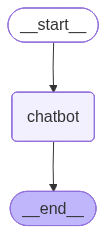

In [14]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass 

In [15]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content="**Cloud Computing: Definition and Overview**\n=============================================\n\nCloud computing is a model of delivering computing services over the internet, where resources such as servers, storage, databases, software, and applications are provided as a service to users on-demand. This allows users to access and use these resources from anywhere, at any time, without the need for physical infrastructure or maintenance.\n\n**Key Characteristics of Cloud Computing**\n----------------------------------------\n\n1. **On-demand self-service**: Users can provision and manage resources without human intervention.\n2. **Broad network access**: Resources are accessible over the internet, from any device, anywhere in the world.\n3. **Resource pooling**: Resources are pooled together to provide a multi-tenant environment, where resources can be dynamically allocated and re-allocated.\n4. **Rapid elasticity**: Resources can be quickly 